In [1]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

import matplotlib.pyplot as plt
from datetime import datetime

2023-12-14 01:26:33.481694: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  print('nop')

2023-12-14 01:26:41.775795: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-12-14 01:26:41.776519: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-12-14 01:26:43.060795: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-14 01:26:43.060958: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.2GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2023-12-14 01:26:43.060974: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-12-14 01:26:43.062564: I tensorflow/stream_executor/platform/defa

In [3]:
# Define parameters
input_shape = (50, 50, 3)  # Adjust based on your dataset
batch_size = 256
num_classes = 50

# train_data_dir = './Dataset/BanglaLekha-Isolated/BanglaLekha-Isolated/Images/'
train_data_dir = './Dataset/b/Train/'


# Create data generators with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data will be used for validationfrom datetime import datetime
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    # color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Set this to 'validation' for the validation set
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    # color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Set this to 'training' for the training set
)

# Define a function to create a model with a specific base model
def create_transfer_model(base_model):
    base_model.trainable = False  # Freeze pre-trained layers
    
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    predictions = layers.Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=predictions)
    
    return model


base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    


Found 9600 images belonging to 50 classes.
Found 2400 images belonging to 50 classes.


2023-12-14 01:27:23.716990: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-14 01:27:23.717386: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-12-14 01:27:23.717551: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-14 01:27:23.717758: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.2GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB

2023-12-14 01:28:07.922535: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-12-14 01:28:07.922558: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-12-14 01:28:07.922585: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2023-12-14 01:28:07.923176: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so.10.1
2023-12-14 01:28:08.023677: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_INSUFFICIENT_PRIVILEGES
2023-12-14 01:28:08.023931: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-12-14 01:28:08.231911: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-12-14 01:28

Epoch 1/50


2023-12-14 01:28:08.699197: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-12-14 01:28:08.961720: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-12-14 01:28:09.823955: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-12-14 01:28:09.871679: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-12-14 01:28:16.052556: W tensorflow/core/common_runtime/bfc_allocator.cc:314] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the av

 2/37 [>.............................] - ETA: 2s - loss: 4.2524 - accuracy: 0.0127  

2023-12-14 01:28:17.475617: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-12-14 01:28:17.475688: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-12-14 01:28:17.476542: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_INSUFFICIENT_PRIVILEGES
2023-12-14 01:28:17.525132: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-12-14 01:28:17.526228: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2023-12-14 01:28:17.526667: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-12-14 01:28:17.527703: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/20231214-012807_vgg16/train/plugins/p

37/37 [==============================] - 24s 408ms/step - loss: 3.8257 - accuracy: 0.0704 - val_loss: 2.8784 - val_accuracy: 0.3420
Epoch 2/50
37/37 [==============================] - 7s 193ms/step - loss: 2.8141 - accuracy: 0.2668 - val_loss: 2.2495 - val_accuracy: 0.4345
Epoch 3/50
37/37 [==============================] - 7s 192ms/step - loss: 2.3126 - accuracy: 0.3641 - val_loss: 1.9125 - val_accuracy: 0.5178
Epoch 4/50
37/37 [==============================] - 7s 195ms/step - loss: 1.9803 - accuracy: 0.4483 - val_loss: 1.7147 - val_accuracy: 0.5495
Epoch 5/50
37/37 [==============================] - 7s 195ms/step - loss: 1.8138 - accuracy: 0.4940 - val_loss: 1.5866 - val_accuracy: 0.5720
Epoch 6/50
37/37 [==============================] - 7s 194ms/step - loss: 1.6646 - accuracy: 0.5322 - val_loss: 1.4536 - val_accuracy: 0.6072
Epoch 7/50
37/37 [==============================] - 7s 196ms/step - loss: 1.5724 - accuracy: 0.5435 - val_loss: 1.3742 - val_accuracy: 0.6246
Epoch 8/50
37/37

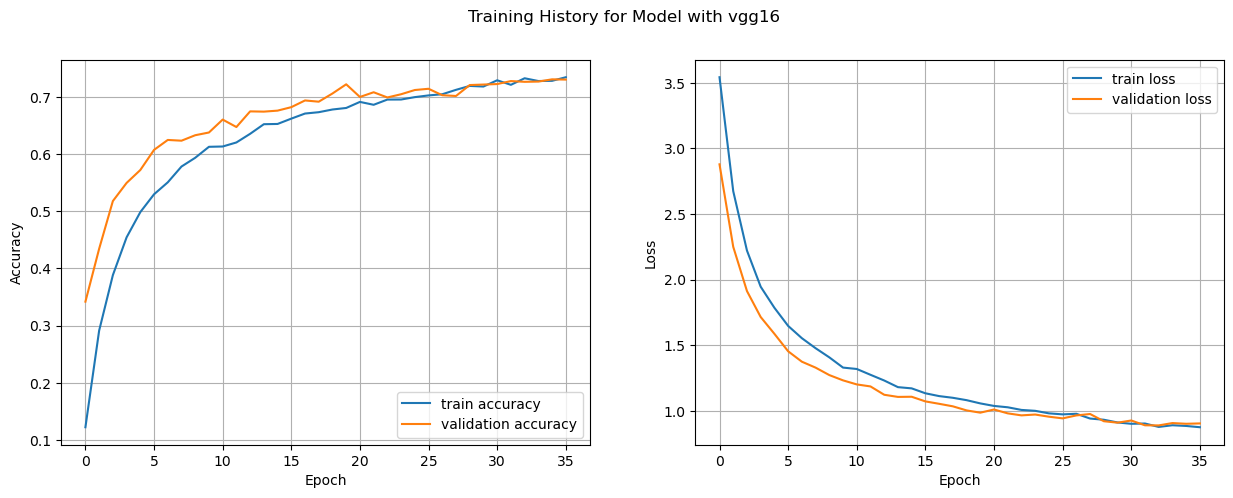

In [4]:
model = create_transfer_model(base_model)
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Define TensorBoard callback
log_dir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S") + "_" + base_model.name
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model with validation data and early stopping
h = model.fit(
    train_generator,
    epochs=50,  # Adjust as needed
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping, tensorboard_callback]
)

# Evaluate the model on your test set if available

# Save the model or store the results for later comparison
model.save('./models/full_model_with_' + base_model.name + '_with_validation_early_stopping.h5')

# Plot and save the training history as a PDF
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
# plt.ylim([0, 1])
plt.legend(loc='upper right')

plt.suptitle('Training History for Model with ' + base_model.name)
plt.savefig('./results/full_training_history_' + base_model.name + '.pdf')
plt.show()